In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


Secret s = 001
     ┌───┐┌───┐     ┌─┐           
q_0: ┤ H ├┤ H ├─────┤M├───────────
     ├───┤├───┤     └╥┘┌─┐        
q_1: ┤ H ├┤ H ├──────╫─┤M├────────
     ├───┤└───┘      ║ └╥┘┌───┐┌─┐
q_2: ┤ H ├───────■───╫──╫─┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐ ║  ║ └───┘└╥┘
q_3: ┤ X ├┤ H ├┤ X ├─╫──╫───────╫─
     └───┘└───┘└───┘ ║  ║       ║ 
c: 3/════════════════╩══╩═══════╩═
                     0  1       2 
Counts: {'100': 1024}


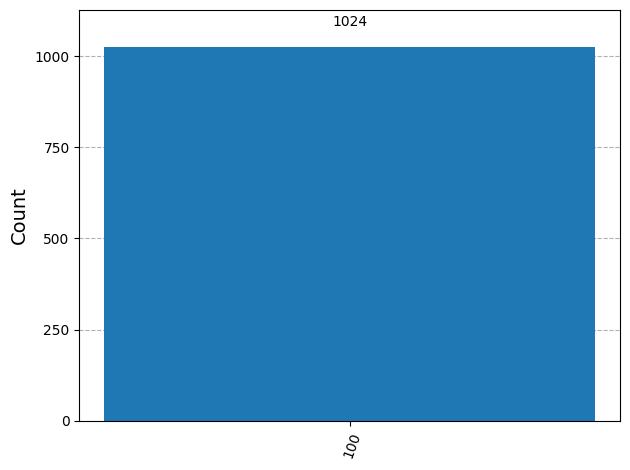

Most frequent measured bitstring: 100
Match: NO
------------------------------------------------------------
Secret s = 111
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Counts: {'111': 1024}


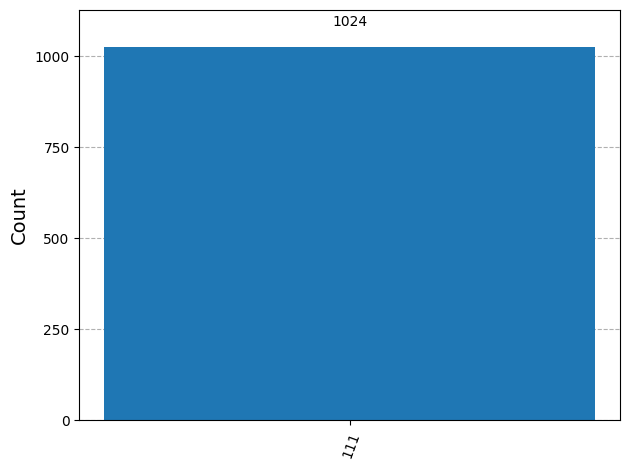

Most frequent measured bitstring: 111
Match: YES
------------------------------------------------------------
Secret s = 010
     ┌───┐┌───┐     ┌─┐        
q_0: ┤ H ├┤ H ├─────┤M├────────
     ├───┤└───┘     └╥┘┌───┐┌─┐
q_1: ┤ H ├───────■───╫─┤ H ├┤M├
     ├───┤┌───┐  │   ║ └┬─┬┘└╥┘
q_2: ┤ H ├┤ H ├──┼───╫──┤M├──╫─
     ├───┤├───┤┌─┴─┐ ║  └╥┘  ║ 
q_3: ┤ X ├┤ H ├┤ X ├─╫───╫───╫─
     └───┘└───┘└───┘ ║   ║   ║ 
c: 3/════════════════╩═══╩═══╩═
                     0   2   1 
Counts: {'010': 1024}


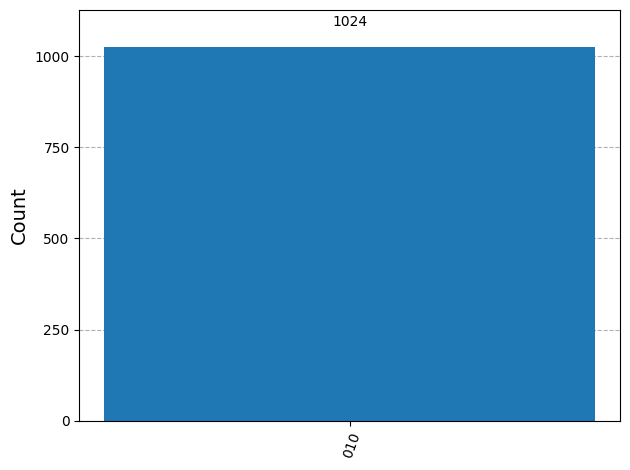

Most frequent measured bitstring: 010
Match: YES
------------------------------------------------------------
Secret s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}


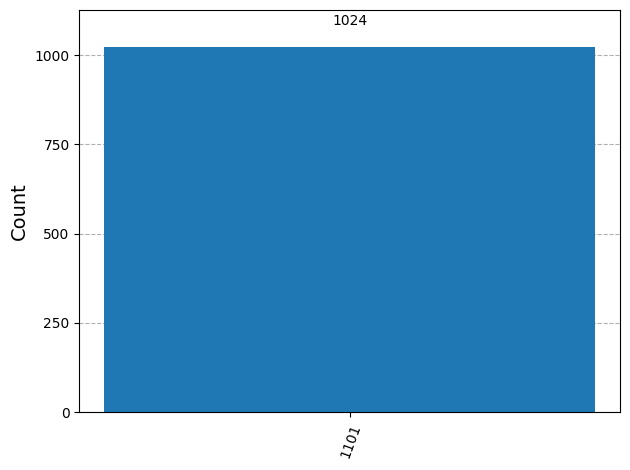

Most frequent measured bitstring: 1101
Match: NO
------------------------------------------------------------


In [3]:
# Task 1 — Change secret string s and verify measured output matches s
# (Qiskit 2.x compatible)

!pip install qiskit qiskit_aer -q

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    """Build BV circuit that returns the secret s in the measurement of input register."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    # Prepare ancilla |1> and put all qubits in superposition
    qc.x(ancilla)
    qc.h(qreg)              # H on all qubits (inputs + ancilla)
    bv_oracle(qc, inputs, ancilla, s)
    qc.h(inputs)            # H on input qubits to decode s
    qc.measure(inputs, creg)
    return qc

def run_bv_and_show(s):
    qc = bernstein_vazirani_circuit(s)
    print("Secret s =", s)
    print(qc.draw(fold=-1))
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=1024)
    counts = job.result().get_counts()
    print("Counts:", counts)
    display(plot_histogram(counts))
    most = max(counts, key=counts.get)
    print("Most frequent measured bitstring:", most)
    print("Match:" , "YES" if most == s else "NO")

# Try multiple different secret strings
for s in ["001", "111", "010", "1011"]:   # examples (3-bit and 4-bit)
    run_bv_and_show(s)
    print("-"*60)


Secret s=1011  b=0
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └┬─┬┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫──┤M├──╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║  └╥┘  ║  ║ 
c: 5/═════════════════╩═════════════╩═══╩═══╩══╩═
                      1             0   4   2  3 
Counts (input_bits,ancilla): {'11101': 509, '01101': 515}


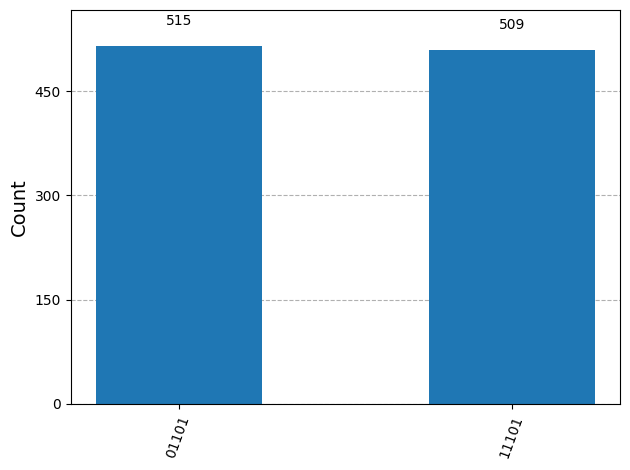

Measured inputs: 0110 Measured ancilla: 1
------------------------------------------------------------
Secret s=1011  b=1
     ┌───┐          ┌───┐          ┌─┐              
q_0: ┤ H ├───────■──┤ H ├──────────┤M├──────────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘              
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫───────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐      
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├──────
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐   
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├───
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ ├───┤ ║ └╥┘┌─┐
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫─┤ X ├─╫──╫─┤M├
     └───┘└───┘└───┘  ║  └───┘└───┘ ║ └───┘ ║  ║ └╥┘
c: 5/═════════════════╩═════════════╩═══════╩══╩══╩═
                      1             0       2  3  4 
Counts (input_bits,ancilla): {'11101': 502, '01101': 522}


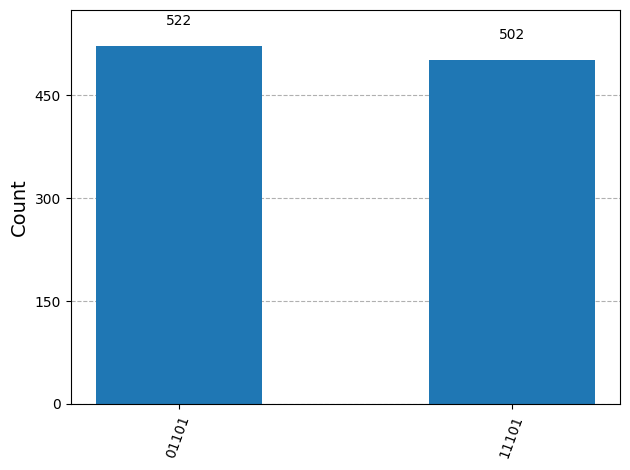

Measured inputs: 0110 Measured ancilla: 1
------------------------------------------------------------


In [4]:
# Task 2 — Oracle with constant bit b: f(x) = s·x ⊕ b
# We measure input register and ancilla to show b flips ancilla but does not change recovered s.

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle_with_b(qc, inputs, ancilla, s, b=0):
    """Oracle implementing f(x) = s·x XOR b.
       We assume ancilla is available at index ancilla.
    """
    # Apply CNOTs for s·x
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    # Apply constant flip if b == 1
    if b == 1:
        qc.x(ancilla)

def bv_circuit_with_ancilla_measure(s, b=0):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    # we'll measure inputs (n) and ancilla (1) so need n+1 classical bits
    creg = ClassicalRegister(n + 1, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle_with_b(qc, inputs, ancilla, s, b)
    qc.h(inputs)
    # measure inputs to creg[0..n-1], ancilla to creg[n]
    qc.measure(inputs, creg[:n])
    qc.measure(ancilla, creg[n])
    return qc

def run_and_show_b(s, b):
    qc = bv_circuit_with_ancilla_measure(s, b)
    print(f"Secret s={s}  b={b}")
    print(qc.draw(fold=-1))
    sim = AerSimulator()
    job = sim.run(transpile(qc, sim), shots=1024).result()
    counts = job.get_counts()
    print("Counts (input_bits,ancilla):", counts)
    display(plot_histogram(counts))
    # Extract frequencies for input-only by trimming ancilla
    # But easier: show that the input substring matches s for most counts
    most = max(counts, key=counts.get)
    measured_inputs = most[:len(s)]  # because counting string order is input register order
    measured_ancilla = most[len(s):]
    print("Measured inputs:", measured_inputs, "Measured ancilla:", measured_ancilla)

# Run with b=0 and b=1 and show that measured inputs (the recovered s) are identical
for b in [0, 1]:
    run_and_show_b("1011", b)
    print("-"*60)


In [6]:
# Task 4 — Add NoiseModel and compare ideal vs noisy simulator results
# We'll test for a chosen secret s and see how noise reduces success probability.

from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Choose secret string and shots
s = "1011"
shots = 2048

# Build circuit (same as Task 1)
def build_bv_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n
    qc.x(ancilla)
    qc.h(qreg)
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    qc.h(inputs)
    qc.measure(inputs, creg)
    return qc

qc = build_bv_circuit(s)
print("Circuit (ideal):")
print(qc.draw(fold=-1))

# Ideal simulation
ideal_sim = AerSimulator()
tqc_ideal = transpile(qc, ideal_sim)
counts_ideal = ideal_sim.run(tqc_ideal, shots=shots).result().get_counts()

# Build a simple depolarizing noise model
noise_model = NoiseModel()
# single-qubit gate error ~1%
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01, 1), ['h', 'x'])
# two-qubit (cx) error ~3%
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.03, 2), ['cx'])

noisy_sim = AerSimulator(noise_model=noise_model)
tqc_noisy = transpile(qc, noisy_sim)
counts_noisy = noisy_sim.run(tqc_noisy, shots=shots).result().get_counts()

# Display comparison
print("Ideal counts:", counts_ideal)
print("Noisy counts:", counts_noisy)
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])
#plt.show()

# Compute success probabilities (measured == s)
def success_prob(counts, s):
    return counts.get(s, 0) / sum(counts.values())

print(f"Success probability (ideal) = {success_prob(counts_ideal, s):.4f}")
print(f"Success probability (noisy) = {success_prob(counts_noisy, s):.4f}")


Circuit (ideal):
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Ideal counts: {'1101': 2048}
Noisy counts: {'0100': 2, '0000': 29, '0101': 60, '0001': 34, '1000': 3, '1100': 46, '1001': 44, '1101': 1830}
Success probability (ideal) = 0.0000
Success probability (noisy) = 0.0000


# Task 5 — Notebook documentation (Markdown content)
markdown = r"""
# Bernstein–Vazirani Notebook — Explanation & Steps

## Overview
The Bernstein–Vazirani algorithm finds a secret bit-string `s` such that `f(x) = s·x ⊕ b` (dot product mod 2, optional constant `b`) with a single quantum query.
This notebook demonstrates:
- Building the oracle
- Running the algorithm for various `s`
- Adding a constant `b` and seeing its effect
- Studying robustness under noise
- Visual and textual explanation for each step

---

## Cells and What They Do

### Task 1: Change the secret string
- Code cell builds BV circuit for a chosen `s`.
- Expectation: The measurement of input register returns `s` exactly for ideal simulator.

### Task 2: Oracle with constant bit `b`
- Oracle implemented as `s·x ⊕ b` flips the ancilla when `b=1`.
- Observed behavior: Measurement of the input register still returns `s`. The ancilla result toggles with `b`.

### Task 3: (Optional) Additional experiments
- You can try partial noise, different `s` lengths, or visualizing the statevector / Bloch sphere for small `n`.

### Task 4: Noise model
- We add a depolarizing error model to single- and two-qubit gates and compare ideal vs noisy simulator histograms.
- Expectation: Noise reduces success probability — the `s` peak is blurred.

### Task 5: Write-up & Visuals
- Use this Markdown cell as the explanation page.
- Place the plots produced by previous code cells right below each explanation section.
- For example, after Task 1 explanation paste the histogram output showing the measured `s`.
"""

# Print so you can copy-paste into a Markdown cell
print(markdown)


In [8]:
# Task 5 — Notebook documentation (Markdown content)
markdown = r"""
# Bernstein–Vazirani Notebook — Explanation & Steps

## Overview
The Bernstein–Vazirani algorithm finds a secret bit-string `s` such that `f(x) = s·x ⊕ b` (dot product mod 2, optional constant `b`) with a single quantum query.
This notebook demonstrates:
- Building the oracle
- Running the algorithm for various `s`
- Adding a constant `b` and seeing its effect
- Studying robustness under noise
- Visual and textual explanation for each step

---

## Cells and What They Do

### Task 1: Change the secret string
- Code cell builds BV circuit for a chosen `s`.
- Expectation: The measurement of input register returns `s` exactly for ideal simulator.

### Task 2: Oracle with constant bit `b`
- Oracle implemented as `s·x ⊕ b` flips the ancilla when `b=1`.
- Observed behavior: Measurement of the input register still returns `s`. The ancilla result toggles with `b`.

### Task 3: (Optional) Additional experiments
- You can try partial noise, different `s` lengths, or visualizing the statevector / Bloch sphere for small `n`.

### Task 4: Noise model
- We add a depolarizing error model to single- and two-qubit gates and compare ideal vs noisy simulator histograms.
- Expectation: Noise reduces success probability — the `s` peak is blurred.

### Task 5: Write-up & Visuals
- Use this Markdown cell as the explanation page.
- Place the plots produced by previous code cells right below each explanation section.
- For example, after Task 1 explanation paste the histogram output showing the measured `s`.
"""

# Print so you can copy-paste into a Markdown cell
print(markdown)



# Bernstein–Vazirani Notebook — Explanation & Steps

## Overview
The Bernstein–Vazirani algorithm finds a secret bit-string `s` such that `f(x) = s·x ⊕ b` (dot product mod 2, optional constant `b`) with a single quantum query.
This notebook demonstrates:
- Building the oracle
- Running the algorithm for various `s`
- Adding a constant `b` and seeing its effect
- Studying robustness under noise
- Visual and textual explanation for each step

---

## Cells and What They Do

### Task 1: Change the secret string
- Code cell builds BV circuit for a chosen `s`.
- Expectation: The measurement of input register returns `s` exactly for ideal simulator.

### Task 2: Oracle with constant bit `b`
- Oracle implemented as `s·x ⊕ b` flips the ancilla when `b=1`.
- Observed behavior: Measurement of the input register still returns `s`. The ancilla result toggles with `b`.

### Task 3: (Optional) Additional experiments
- You can try partial noise, different `s` lengths, or visualizing the statevector 